In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/Users/roywu/Desktop/MIT/Project/pipette_scheduling/analysis/cost_analysis/random_shuffling/cost_running_time_new_methods.csv',dtype={'Task': str})
df['Task'] = df['Task'].replace({"12 to 12": "12-well plate -> 12-well plate","24 to 24": "24-well plate -> 24-well plate", "96 to 96": "96-well plate -> 96-well plate", "384 to 384": "384-well plate -> 384-well plate"})
# transfer Task to color
tasks = df['Task'].unique()
# create a color map
color_map = {"12-well plate -> 12-well plate": "red", "24-well plate -> 24-well plate": "blue", "96-well plate -> 96-well plate": "green", "384-well plate -> 384-well plate": "orange"}
#color_map = {"12 to 12": "red", "24 to 24": "blue", "96 to 96": "green", "384 to 384": "orange"}
# add additional column


In [ ]:
# add a new column to the dataframe
df['Color'] = df['Task'].map(color_map)

In [5]:
df

,Task,Cost,Time,Color
0,12-well plate -> 12-well plate,91,271,red
1,12-well plate -> 12-well plate,192,521,red
2,12-well plate -> 12-well plate,383,1052,red
3,12-well plate -> 12-well plate,96,274,red
4,12-well plate -> 12-well plate,189,536,red
5,12-well plate -> 12-well plate,368,1039,red
6,12-well plate -> 12-well plate,97,265,red
7,12-well plate -> 12-well plate,195,539,red
8,12-well plate -> 12-well plate,377,1043,red
9,24-well plate -> 24-well plate,185,526,blue


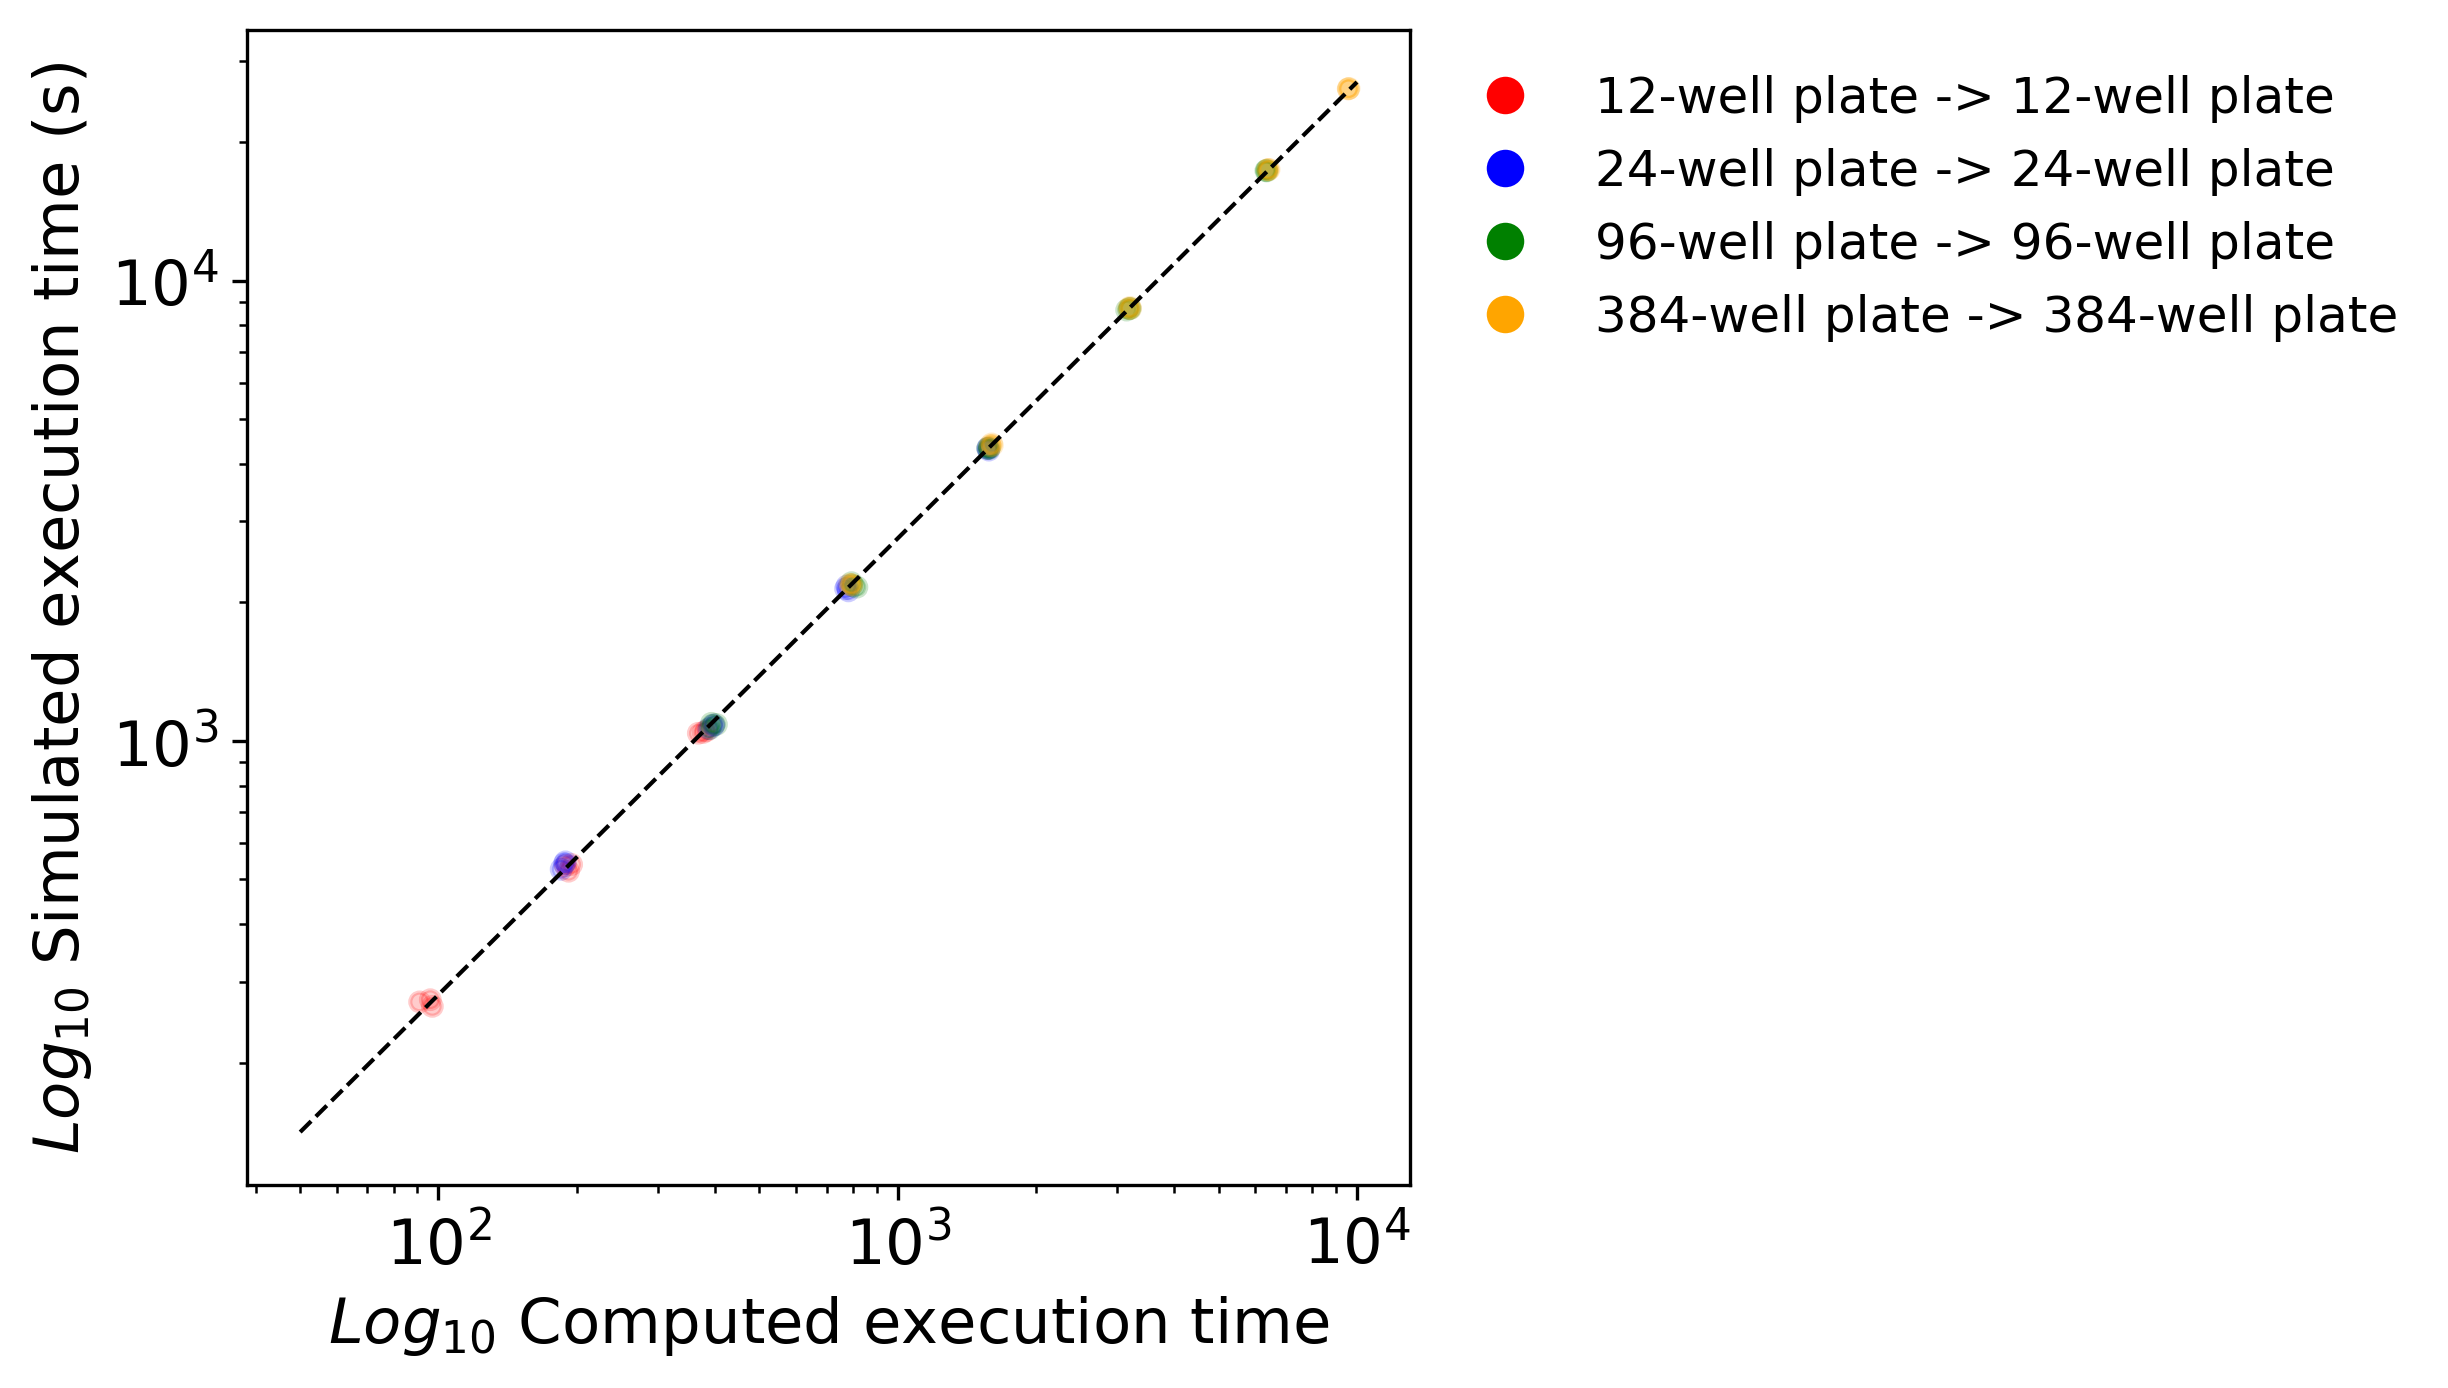

In [32]:
# plot Time and Cost, label the color of the dot with the Task which are strings
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

ax.scatter(df['Cost'], df['Time'], c=df['Color'], alpha=0.2,s=20)

#ax.set_title('Time vs Cost')
# add a legend
legend_labels = {task: color for task, color in color_map.items()}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=task, markerfacecolor=color, markersize=10) for task, color in legend_labels.items()]
ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 1),frameon=False, fontsize=12)
# use log scale for y axis
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$Log_{10}$ Computed execution time', fontsize=15)
ax.set_ylabel('$Log_{10}$ Simulated execution time (s)', fontsize=15)

# set the ticks size
ax.tick_params(axis='both', which='major', labelsize=15)
# add a trend line
z = np.polyfit(np.log10(df['Cost']), np.log10(df['Time']), 1)
p = np.poly1d(z)
x = np.linspace(50, 10000, 1000)
y = 10**p(np.log10(x))
ax.plot(x, y, color='black', linewidth=1, linestyle='--')


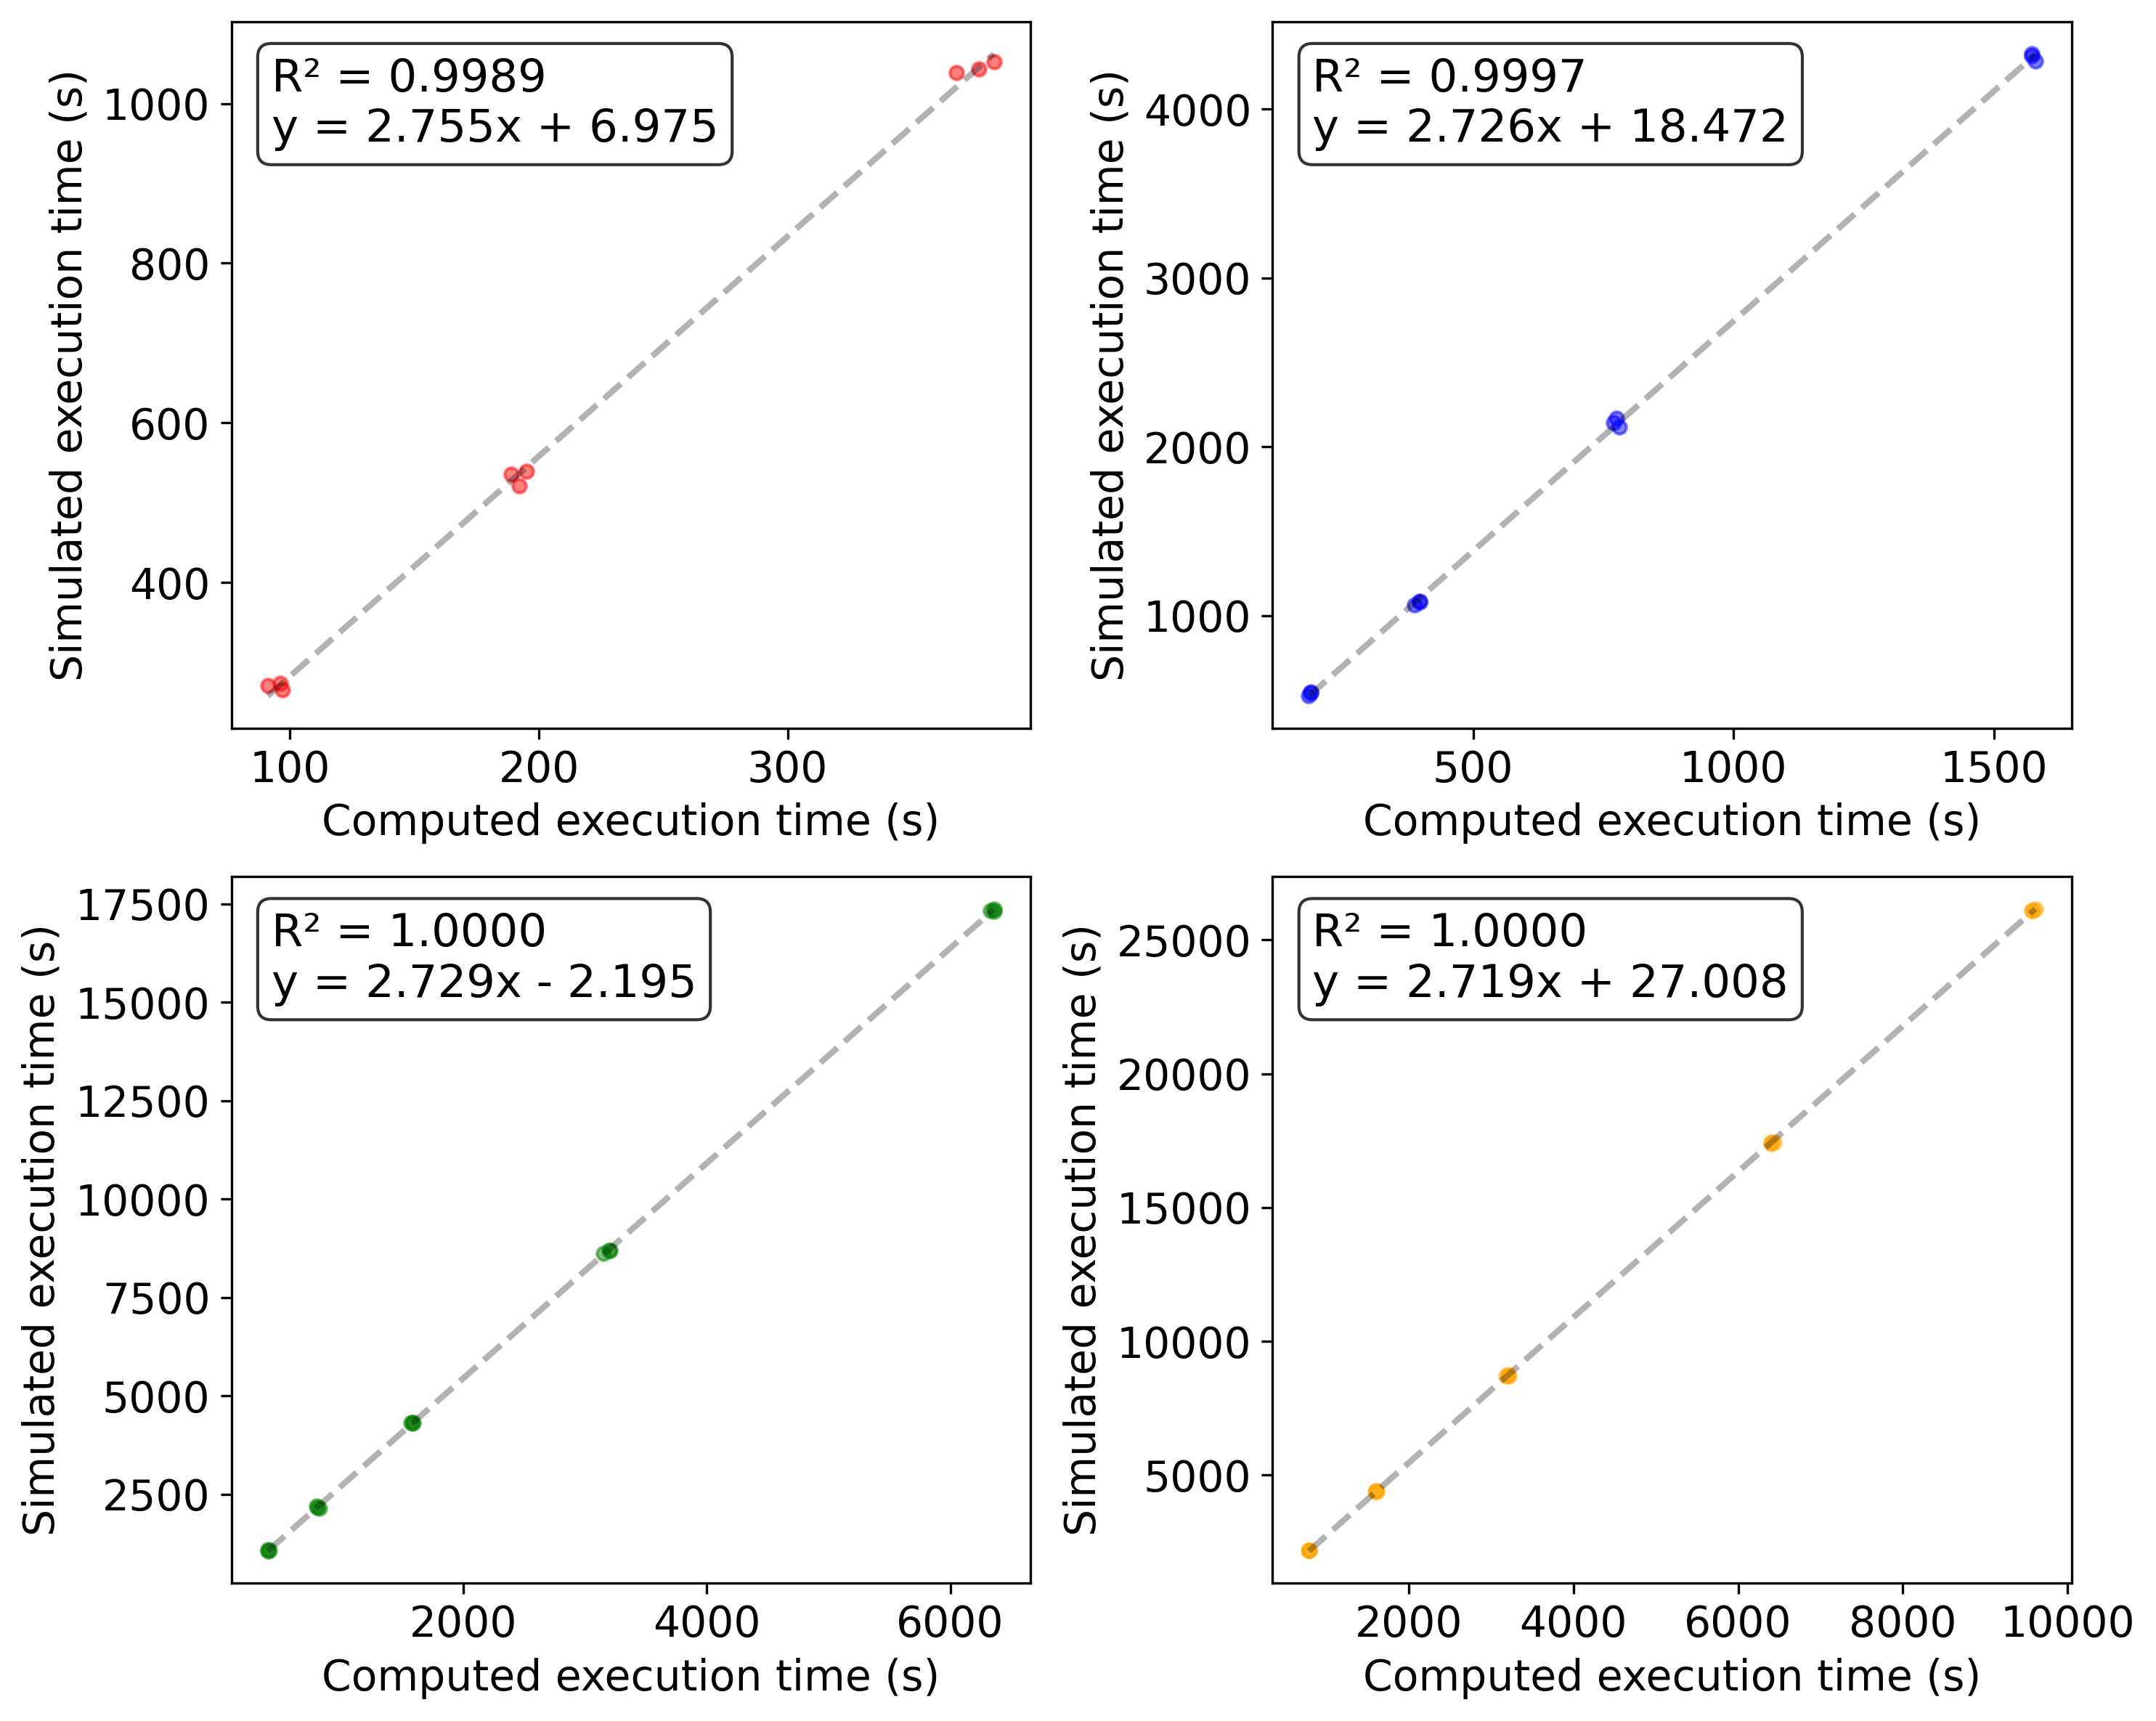

In [42]:
# Create 4 subplots for each task type with trend lines and equations (no log transformation)
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=300)
axes = axes.flatten()

tasks = df['Task'].unique()

for i, task in enumerate(tasks):
    ax = axes[i]
    
    # Filter data for current task
    task_data = df[df['Task'] == task]
    
    # Scatter plot
    ax.scatter(task_data['Cost'], task_data['Time'], 
               c=color_map[task], alpha=0.5, s=20)
    
    # Calculate and plot trend line using linear regression (no log10)
    if len(task_data) > 1:  # Need at least 2 points for trend line
        z = np.polyfit(task_data['Cost'], task_data['Time'], 1)
        p = np.poly1d(z)
        slope, intercept = z[0], z[1]
        
        # Create smooth line for trend directly from the model
        x_min, x_max = task_data['Cost'].min(), task_data['Cost'].max()
        x_trend = np.linspace(x_min, x_max, 100)
        y_trend = p(x_trend)
        
        ax.plot(x_trend, y_trend, color='black', linewidth=2, linestyle='--', alpha=0.3)
        
        # Calculate R² using linear correlation (without log transformation)
        correlation_matrix = np.corrcoef(task_data['Cost'], task_data['Time'])
        r_squared = correlation_matrix[0,1]**2
        
        # Format equation in linear scale: y = slope*x + intercept
        if intercept >= 0:
            equation = f'y = {slope:.3f}x + {intercept:.3f}'
        else:
            equation = f'y = {slope:.3f}x - {abs(intercept):.3f}'
            
        ax.text(0.05, 0.95, f'R² = {r_squared:.4f}\n{equation}', 
                transform=ax.transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                verticalalignment='top', fontsize=15)
    
    # Set labels and title
    ax.set_xlabel('Computed execution time (s)', fontsize=14)
    ax.set_ylabel('Simulated execution time (s)', fontsize=14)
    #ax.set_title(task, fontsize=12, pad=10)
    
    # Set tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # Optional: add grid for better readability
    #ax.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()